In [2]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
import time
import pickle

In [59]:
# load american gut data
data_pickle = pickle.load(open("/Users/david/Dropbox/ARGAN/python/AG/AG.p","rb"))
counts = data_pickle[0]
counts_norm = counts / np.sum(counts, axis=1, keepdims=True)
counts_norm = np.sqrt(counts_norm)
counts_norm = counts_norm / np.max(counts_norm)
counts_norm = (counts_norm * 2) - 1

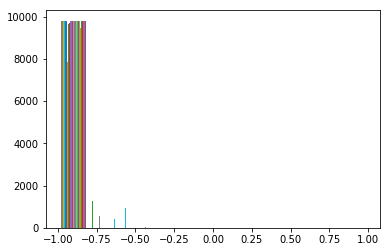

In [61]:
plt.hist(counts_norm)
plt.show()

In [ ]:
pca = PCA(n_components=100)
Y_pca = pca.fit_transform(counts_norm)

In [49]:
# params
num_at = 4
noise_z_std = 0.05
z_dim = [256,128,64]
#z_dim = [] # linear AA
act_out = tf.nn.tanh
#act_out = None # linear last layer
input_dim = data.shape[1]

In [50]:
# network
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [51]:
# train
model.train(Y_pca, batch_size=128, num_batches=5000)

Iter [       0] Time [0.3117] loss [7.9935]
Iter [     500] Time [9.8974] loss [0.0020]
Iter [    1000] Time [18.8460] loss [0.0015]
Iter [    1500] Time [28.4706] loss [0.0019]
Iter [    2000] Time [37.8863] loss [0.0019]
Iter [    2500] Time [47.9236] loss [0.0021]
Iter [    3000] Time [57.7278] loss [0.0015]
Iter [    3500] Time [67.2509] loss [0.0021]
Iter [    4000] Time [76.7068] loss [0.0220]
Iter [    4500] Time [86.3180] loss [0.0015]
Iter [    5000] Time [96.0289] loss [0.4173]
Iter [    5500] Time [106.0506] loss [0.0015]
Iter [    6000] Time [115.6709] loss [0.0016]
Iter [    6500] Time [125.3154] loss [0.2213]
Iter [    7000] Time [134.6638] loss [0.2061]
Iter [    7500] Time [143.9257] loss [0.0021]
Iter [    8000] Time [154.0434] loss [0.0017]
Iter [    8500] Time [163.3386] loss [2.1222]
Iter [    9000] Time [172.6345] loss [0.0021]
Iter [    9500] Time [182.2675] loss [0.0019]
Iter [    9999] Time [192.0103] loss [0.0014]
done.


In [52]:
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

loss: 0.0014


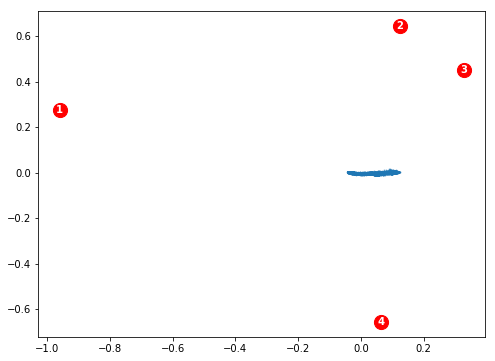

In [53]:
model.plot_at_pca_single(data)

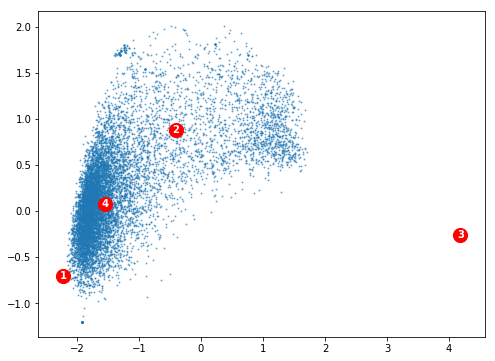

In [54]:
model.plot_pca_ats_data(data)

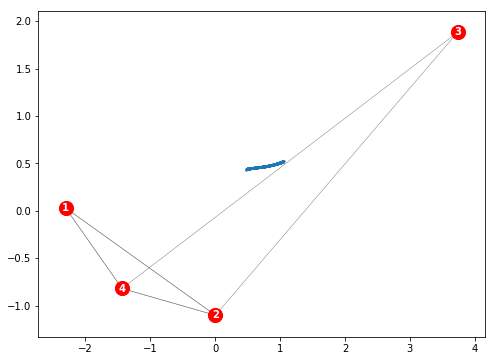

In [55]:
model.plot_at_mds(data)

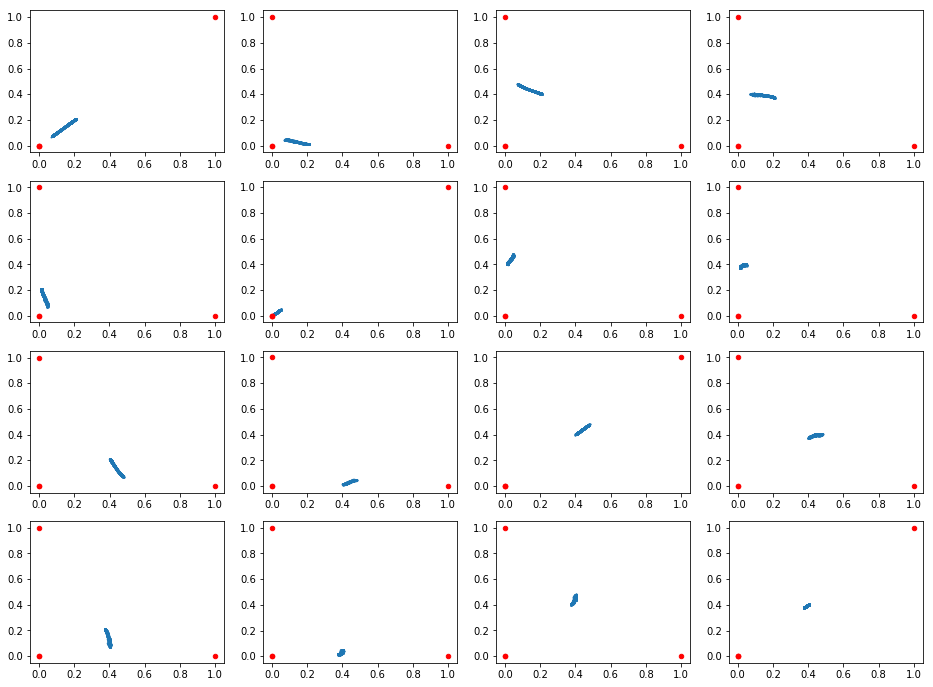

In [56]:
model.plot_at(data)

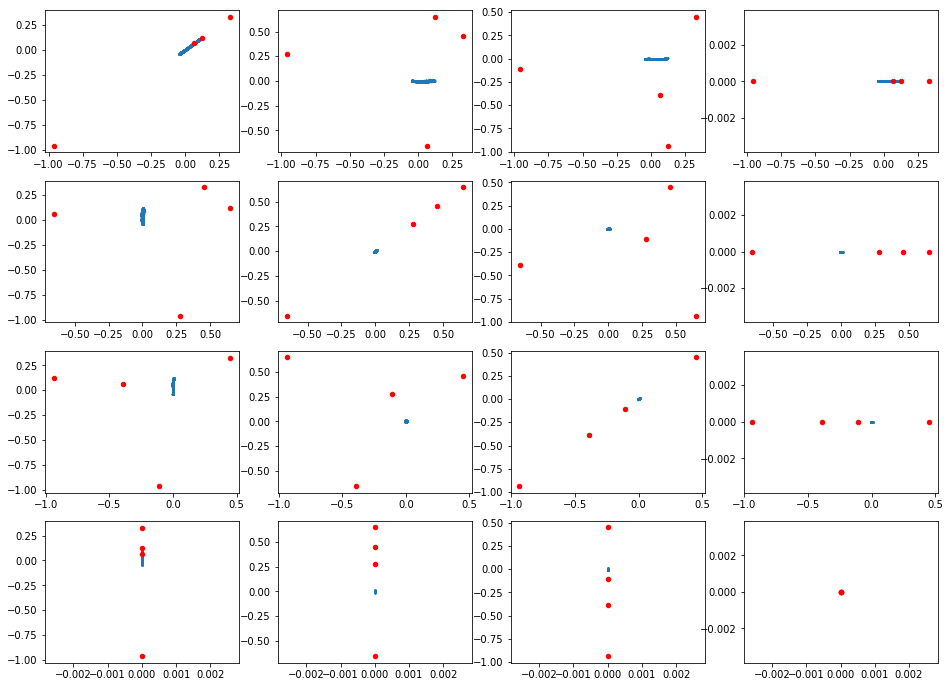

In [57]:
model.plot_at_pca(data)